In [10]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
import csv

In [11]:
fileName = '../1000_population.tsv'


lines = []
categories = ["All"]
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [12]:
def random_colors(num_colors):
    random_colors = []
    for _ in range(num_colors):
        random_color = list(np.random.rand(3))
        random_colors.append(random_color)
    return random_colors
#27 random color
num_colors = 27
color_list = random_colors(num_colors)
color_list

[[0.803592719239353, 0.07457554499324393, 0.08635843699408574],
 [0.8131757646427068, 0.6611787119538225, 0.9025319598696689],
 [0.7908940822492386, 0.887738710005275, 0.4593830300035725],
 [0.11262879815464988, 0.6738497174996444, 0.7263084525927469],
 [0.40052025001975533, 0.9157305187512866, 0.2136947470360313],
 [0.07427819312489936, 0.2086919098925819, 0.3491360106286271],
 [0.28455610609052195, 0.9768081669639519, 0.6043467186285565],
 [0.18670141819889052, 0.8679096535902506, 0.7457499203837508],
 [0.5335165797550816, 0.7797094491392744, 0.496122297256126],
 [0.9772793325608138, 0.32421218295397247, 0.0316678829242365],
 [0.003634674884501088, 0.9762288234717079, 0.20219749369341877],
 [0.562820515607618, 0.15926916980903438, 0.39003467252576596],
 [0.9186275494520341, 0.9173053704467811, 0.3342510040059963],
 [0.41359204425452445, 0.993980121172881, 0.24532508021349886],
 [0.5691972280562843, 0.3574579785653762, 0.4362824930394782],
 [0.7156454833141956, 0.7321540477863497, 0.1

In [4]:
len(allcategories)

27

In [13]:
#pic2
mhc_pos_path="../csvfiles/posmhc_all.csv"
df_mhc_pos_path=pd.read_csv(mhc_pos_path)
df_race_pos=pd.read_csv("../csvfiles/mhc_race.csv")

In [14]:

mhc_race_positions_dict={'ACB': {'mhc': [[32589647, 32805573]]},
  'All':{'mhc':[[32453110, 32577355], [32589647, 32716541]]},                       
 'ASW': {'mhc': [[29753369, 29913914],
   [29939668, 30120966],
   [32627859, 32843772]]},
 'BEB': {},
 'CDX': {'mhc': [[31295439, 31432528]]},
 'CEU': {'mhc': [[32627859, 32776791]]},
 'CHB': {},
 'CHS': {'mhc': [[32589647, 32716541]]},
 'CLM': {'mhc': [[32453110, 32577355], [32589647, 32732048]]},
 'ESN': {'mhc': [[29720403, 29896285], [32644320, 32843772]]},
 'FIN': {},
 'GBR': {'mhc': [[32453110, 32577355]]},
 'GIH': {'mhc': [[32589647, 32698571]]},
 'GWD': {'mhc': [[29720403, 29913914],
   [29939668, 30085606],
   [32627859, 32732048]]},
 'IBS': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'ITU': {'mhc': [[32423532, 32554290]]},
 'JPT': {'mhc': [[32589647, 32732048]]},
 'KHV': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'LWK': {'mhc': [[32627859, 32805573]]},
 'MSL': {'mhc': [[29720403, 29913914],
   [31317765, 31528792],
   [32554291, 32776791]]},
 'MXL': {'mhc': [[32589647, 32716541]]},
 'PEL': {'mhc': [[32473902, 32616414]]},
 'PJL': {},
 'PUR': {'mhc': [[32589647, 32683157]]},
 'STU': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'TSI': {'mhc': [[32589647, 32698571]]},
 'YRI': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [32589647, 32882258]]}}

In [15]:
zipped_color_list=dict(zip(allcategories,color_list))
zipped_color_list

{'ACB': [0.803592719239353, 0.07457554499324393, 0.08635843699408574],
 'ASW': [0.8131757646427068, 0.6611787119538225, 0.9025319598696689],
 'All': [0.7908940822492386, 0.887738710005275, 0.4593830300035725],
 'BEB': [0.11262879815464988, 0.6738497174996444, 0.7263084525927469],
 'CDX': [0.40052025001975533, 0.9157305187512866, 0.2136947470360313],
 'CEU': [0.07427819312489936, 0.2086919098925819, 0.3491360106286271],
 'CHB': [0.28455610609052195, 0.9768081669639519, 0.6043467186285565],
 'CHS': [0.18670141819889052, 0.8679096535902506, 0.7457499203837508],
 'CLM': [0.5335165797550816, 0.7797094491392744, 0.496122297256126],
 'ESN': [0.9772793325608138, 0.32421218295397247, 0.0316678829242365],
 'FIN': [0.003634674884501088, 0.9762288234717079, 0.20219749369341877],
 'GBR': [0.562820515607618, 0.15926916980903438, 0.39003467252576596],
 'GIH': [0.9186275494520341, 0.9173053704467811, 0.3342510040059963],
 'GWD': [0.41359204425452445, 0.993980121172881, 0.24532508021349886],
 'IBS': [0

In [16]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911],
 
 }

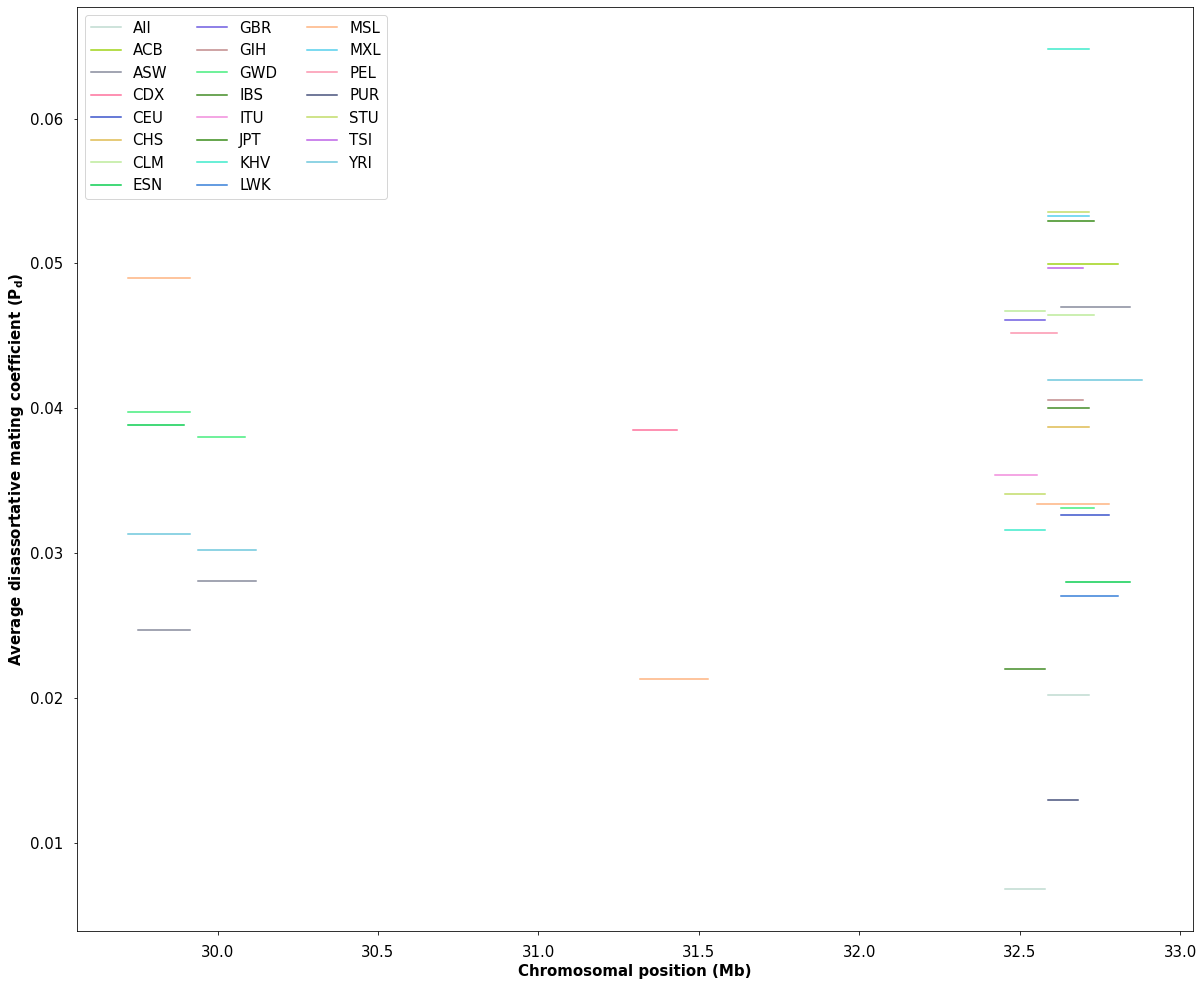

In [17]:
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
plt.rcParams['mathtext.default'] = 'regular'
plt.figure(figsize=(20, 17), facecolor='white')
# plt.rcParams["figure.figsize"] = (20,17)
#{race:p-average}
result_dict=dict()
for k,vs in mhc_race_positions_dict.items():
    middledict=dict()
    if vs:
        if k=="All":            
            for v in vs["mhc"]:
                pos_P_list=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=v[0]) & (df_mhc_pos_path["Unnamed: 0"]<=v[1])]["P"].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
        else:
            for v in vs["mhc"]:
                pos_P_list=df_race_pos[(df_race_pos["Unnamed: 0"]>=v[0]) & (df_race_pos["Unnamed: 0"]<=v[1])][k].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
            

seen_races=set()
for race,middledict_items in result_dict.items():

    for region,ava in middledict_items.items():
        x=[region[0],region[1]]
        y=[ava,ava]
        plt.plot(np.array(x)/ 1000000, y, color=zipped_color_list[race])
        if race not in seen_races:
            plt.plot([], [], color=zipped_color_list[race], label=race)
            seen_races.add(race)
            
handles, labels = plt.gca().get_legend_handles_labels()
order = [ 1, 0,   2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]

plt.tick_params(axis='both', which='major', labelsize=15,pad=10) 
# plt.scatter(x_values1, y_values1,s=1)
# plt.title("Disassortative mating MHC region and Average Probability",fontsize=25)
# plt.xlabel("Position",fontsize=20)
plt.xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold')
plt.ylabel(r"Average disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')

# plt.ylabel("Average Probability",fontsize=20)

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="upper left",fontsize=15,  ncol=3, frameon=True)
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="upper left",fontsize=15,  bbox_to_anchor=(1.1, 1), frameon=True)
plt.plot()
plt.savefig("pic2.png",dpi=600)

